In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data from Excel
file_path = 'Ev Sales.xlsx'
df = pd.read_excel(file_path, usecols=[0,3])  # Assuming column 0 = Month, column 3 = LMV

# Clean column names
df.columns = ['Month', 'EV_Sales']

# Remove commas and convert to integer
df['EV_Sales'] = df['EV_Sales'].astype(str).str.replace(',', '').astype(int)

# Convert Month to datetime
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.set_index('Month', inplace=True)

# Fit SARIMA model — using seasonal_order with period=12 (monthly seasonality)
sarima_model = SARIMAX(df['EV_Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))


sarima_result = sarima_model.fit(disp=False)

# Forecast next 12 months (or adjust steps)
forecast_steps = 50
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Forecast index starts after the last known month
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')

# Extract forecast values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create forecast DataFrame
# Display forecast table
forecast_df = pd.DataFrame({
    'Month': forecast_values.index,
    'Forecasted_Sales': forecast_values.values,
    'Lower_CI': forecast_conf_int.iloc[:, 0].values,
    'Upper_CI': forecast_conf_int.iloc[:, 1].values
})
print(forecast_df)

# Plot actual vs forecasted
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['EV_Sales'], label='Actual Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Monthly LMV EV Sales and Forecast in India')
plt.xlabel('Month')
plt.ylabel('Number of LMV EVs Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements

C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:4

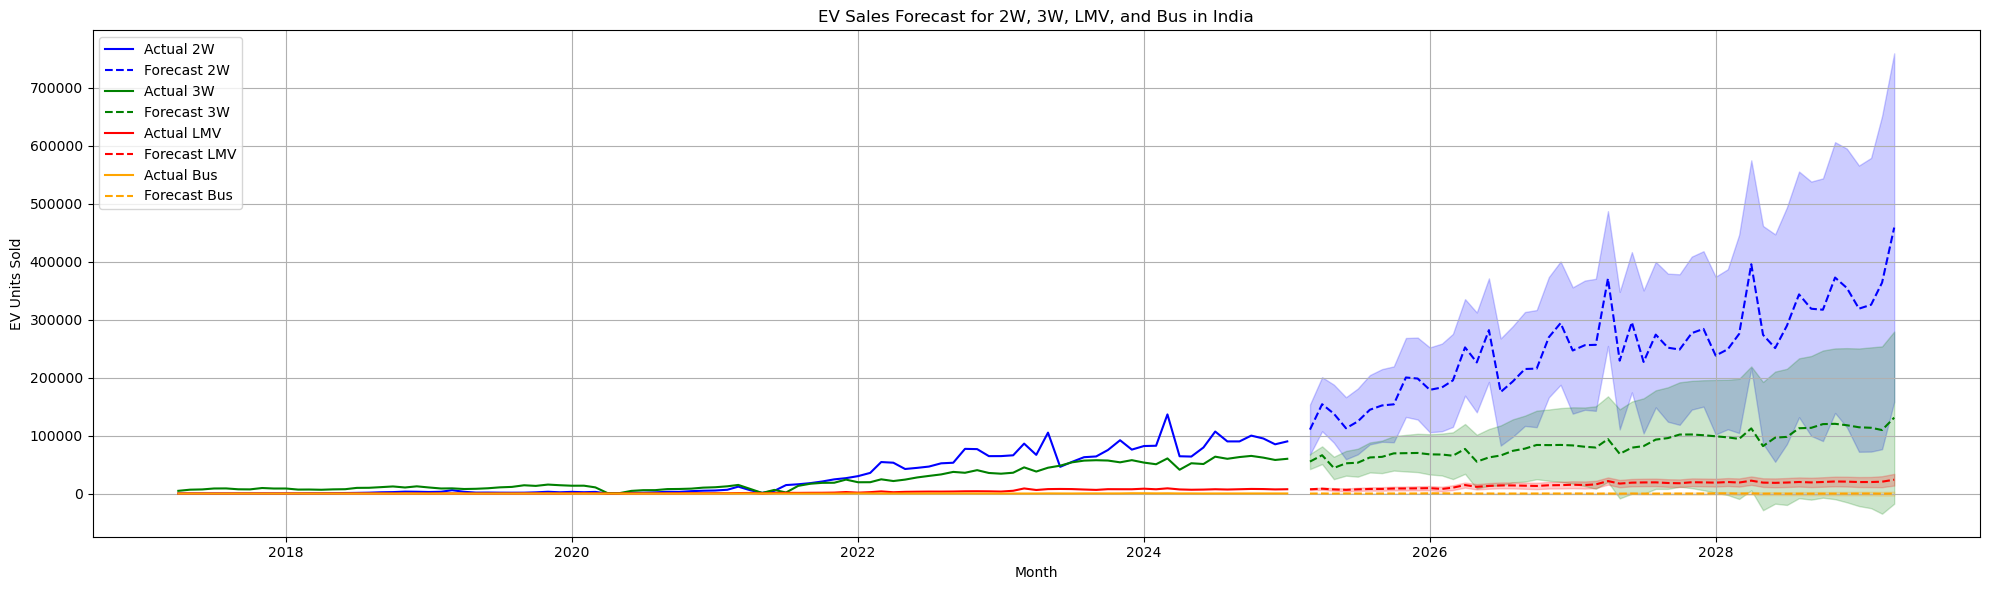

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data
file_path = 'Ev Sales.xlsx'
df = pd.read_excel(file_path, usecols=[0, 1, 2, 3, 4])  # 0=Month, 1=2W, 2=3W, 3=LMV, 4=Bus
df.columns = ['Month', '2W', '3W', 'LMV', 'Bus']

# Clean and convert all EV sales columns
for col in ['2W', '3W', 'LMV', 'Bus']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(int)

# Convert 'Month' to datetime
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.set_index('Month', inplace=True)

# Forecast settings
forecast_steps = 50
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')

# Store results
forecast_data = {}

# Function to fit SARIMA and forecast
def forecast_series(series, label):
    model = SARIMAX(
        series,
        order=(1, 1, 1),
        seasonal_order=(2, 2, 2, 12),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    result = model.fit(disp=False)
    forecast = result.get_forecast(steps=forecast_steps)
    forecast_values = forecast.predicted_mean
    conf_int = forecast.conf_int()
    forecast_data[label] = {
        'actual': series,
        'forecast': forecast_values,
        'lower': conf_int.iloc[:, 0],
        'upper': conf_int.iloc[:, 1]
    }

# Apply forecasting for each category
for category in ['2W', '3W', 'LMV', 'Bus']:
    forecast_series(df[category], category)

# Plot all actual and forecasted data
plt.figure(figsize=(20, 6))
colors = {'2W': 'blue', '3W': 'green', 'LMV': 'red', 'Bus': 'orange'}

for category in ['2W', '3W', 'LMV', 'Bus']:
    plt.plot(df.index, forecast_data[category]['actual'], label=f'Actual {category}', color=colors[category])
    plt.plot(forecast_index, forecast_data[category]['forecast'], label=f'Forecast {category}', linestyle='--', color=colors[category])
    plt.fill_between(forecast_index, forecast_data[category]['lower'], forecast_data[category]['upper'], color=colors[category], alpha=0.2)

plt.title('EV Sales Forecast for 2W, 3W, LMV, and Bus in India')
plt.xlabel('Month')
plt.ylabel('EV Units Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will b

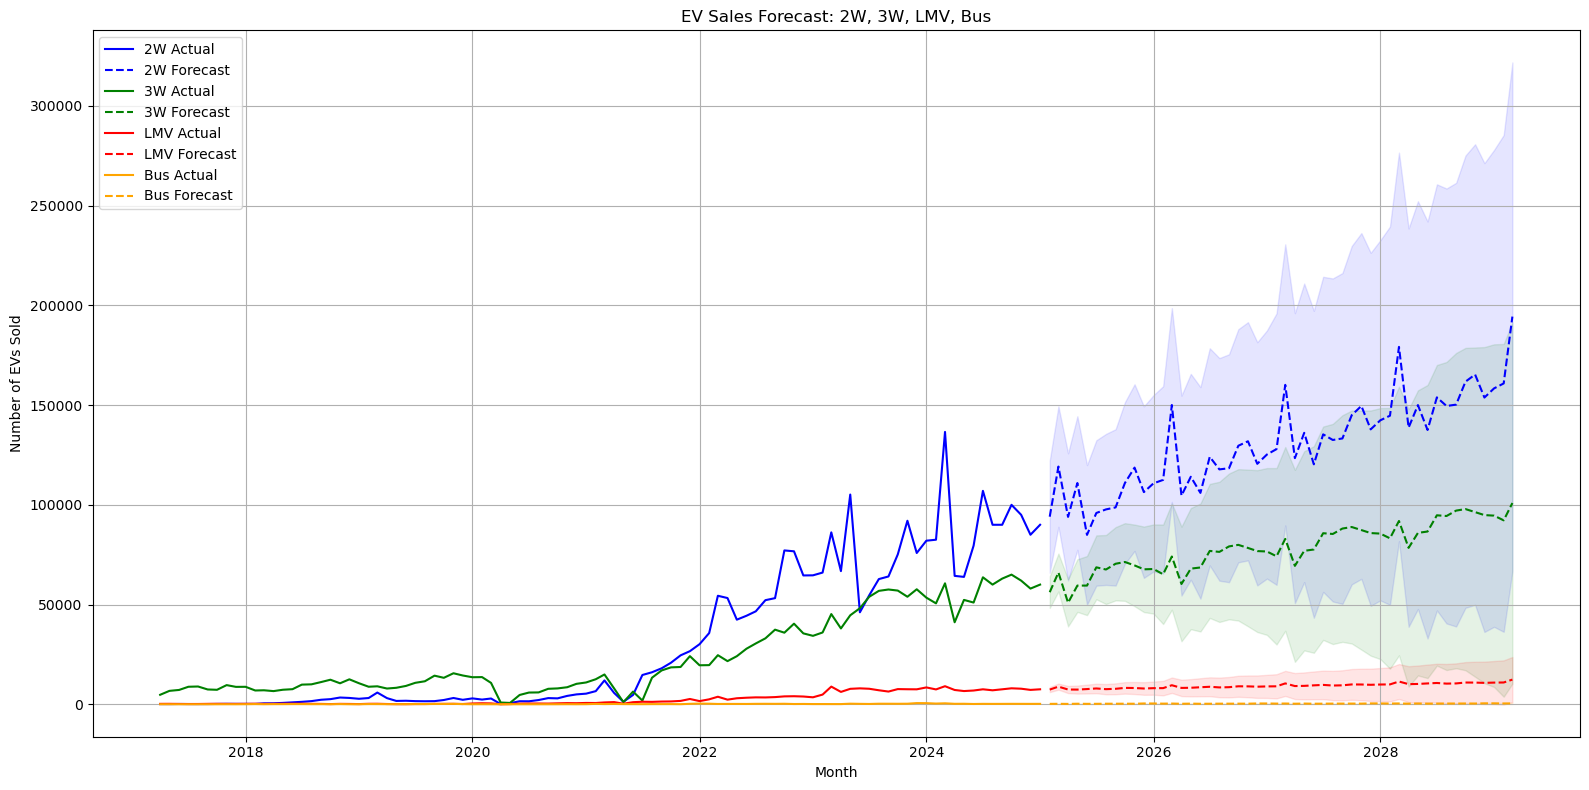

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the Excel file
file_path = 'Ev Sales.xlsx'
df = pd.read_excel(file_path, usecols=[0, 1, 2, 3, 4])  # Columns: Month, 2W, 3W, LMV, Bus

# Rename columns
df.columns = ['Month', '2W', '3W', 'LMV', 'Bus']

# Clean numeric columns (remove commas and convert to int)
for col in ['2W', '3W', 'LMV', 'Bus']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(int)

# Convert 'Month' to datetime and set as index
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.set_index('Month', inplace=True)

# Forecasting setup
forecast_steps = 50
forecast_data = {}

# Function to fit SARIMA and forecast
def forecast_series(series, label):
    model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    result = model.fit(disp=False)
    forecast = result.get_forecast(steps=forecast_steps)
    forecast_values = forecast.predicted_mean
    conf_int = forecast.conf_int()

    # Set forecast index
    forecast_index = pd.date_range(start=series.index[-1] + pd.DateOffset(months=1),
                                   periods=forecast_steps, freq='MS')
    forecast.index = forecast_index
    forecast_data[label] = {
        'actual': series,
        'forecast': forecast_values,
        'lower': conf_int.iloc[:, 0],
        'upper': conf_int.iloc[:, 1],
        'index': forecast_index
    }

# Apply forecasting to each category
for category in ['2W', '3W', 'LMV', 'Bus']:
    forecast_series(df[category], category)

# Plot actual vs forecasted for all 4 categories
plt.figure(figsize=(16, 8))
colors = {'2W': 'blue', '3W': 'green', 'LMV': 'red', 'Bus': 'orange'}

for category in forecast_data:
    # Actual
    plt.plot(df.index, forecast_data[category]['actual'], label=f'{category} Actual', color=colors[category])
    # Forecast
    plt.plot(forecast_data[category]['index'], forecast_data[category]['forecast'],
             label=f'{category} Forecast', linestyle='--', color=colors[category])
    # Confidence interval
    plt.fill_between(forecast_data[category]['index'],
                     forecast_data[category]['lower'],
                     forecast_data[category]['upper'],
                     color=colors[category], alpha=0.1)

plt.title('EV Sales Forecast: 2W, 3W, LMV, Bus')
plt.xlabel('Month')
plt.ylabel('Number of EVs Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
